In [2]:
import anndata as ad
import matplotlib.pyplot as plt
import numpy as np
lipids_filepath = '/data/lipidatlas/REBUTTAL/WEBSITE/consecutiveSection-lipids.h5ad'
hybiss_filepath = '/data/lipidatlas/REBUTTAL/WEBSITE/consecutiveSection-RNA.h5ad'

adata_l = ad.read_h5ad(lipids_filepath)
adata_g = ad.read_h5ad(hybiss_filepath)


# Create a Gallery

## lipids

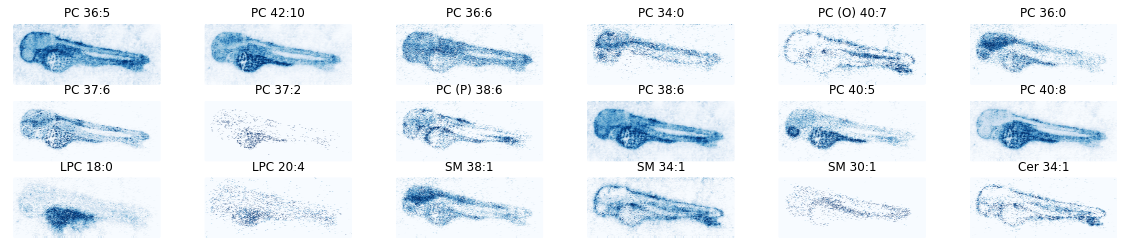

In [65]:
fig = plt.figure(None, (20,4))
gs = plt.GridSpec(3,6)

for i, ix_lipid in enumerate(np.arange(7, 90, 3).astype(int)[:18]):
    plt.subplot(gs[i])
    plt.scatter(adata_l.uns['x_coord'], adata_l.uns['y_coord'], 
                c= adata_l.X[:,ix_lipid], s=1, cmap='Blues',
                rasterized=True, 
                vmax= np.percentile(adata_l.X[:,ix_lipid],98))

    plt.title(adata_l.var.iloc[ix_lipid].values[0])
    plt.axis('off')
    plt.gca().invert_yaxis()


## RNA

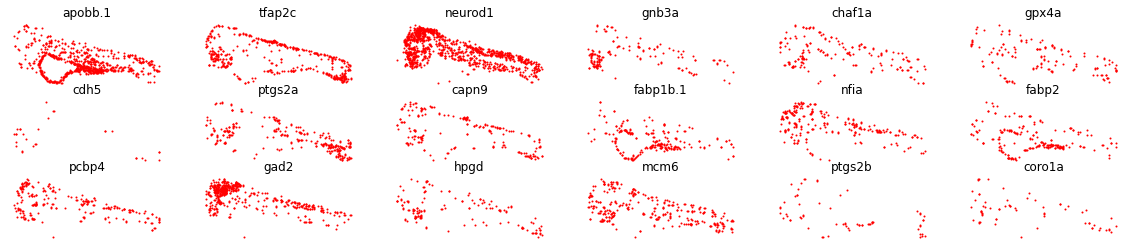

In [67]:

fig = plt.figure(None, (20,4))
gs = plt.GridSpec(3,6)

for i, ix_gene in enumerate(np.arange(0, 80, 3).astype(int)[:18]):
    plt.subplot(gs[i])
    
    ix_spot = np.argwhere(adata_g.X[:,ix_gene] > 0).flatten()
    plt.scatter(adata_g.uns['x_coord'][ix_spot], adata_g.uns['y_coord'][ix_spot], s=1, color='red',
                rasterized=True)

    plt.title(adata_g.var.iloc[ix_gene].values[0])
    plt.axis('off')
    plt.gca().invert_yaxis()


## Merge

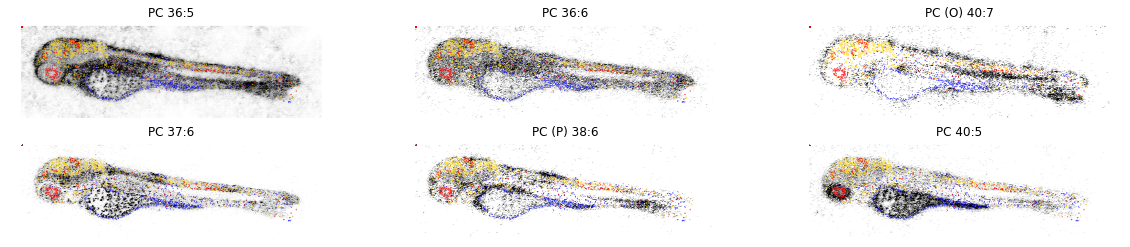

In [69]:
# show on top the 3 most useful genes
genes_select = ['sox11a', 'apoc2', 'pax6a']
colors = ['gold', 'blue', 'red']

fig = plt.figure(None, (20,4))
gs = plt.GridSpec(2,3)

for i, ix_lipid in enumerate(np.arange(7, 90, 6).astype(int)[:6]):
    plt.subplot(gs[i])
    plt.scatter(adata_l.uns['x_coord'], adata_l.uns['y_coord'], 
                c= adata_l.X[:,ix_lipid], s=1, cmap='Greys',
                rasterized=True, 
                vmax= np.percentile(adata_l.X[:,ix_lipid],98))
    
    # scatter on top genes of interest
    for ig, g in enumerate(genes_select):
        ix_gene = np.argwhere((adata_g.var.values.flatten() == g)).flatten()
        ix_spot = np.argwhere(adata_g.X[:,ix_gene] > 0).flatten()
        plt.scatter(adata_g.uns['x_coord'][ix_spot], 
                    adata_g.uns['y_coord'][ix_spot], s=1, 
                    color=colors[ig],
                    edgecolor='none',
                    alpha=0.7,
                    rasterized=True)
        
    
    plt.title(adata_l.var.iloc[ix_lipid].values[0])
    plt.axis('off')
    plt.gca().invert_yaxis()
